In [182]:
import pandas as pd 
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
import math

In [183]:
Tesla_dataframe = pd.read_csv("TSLA.csv")
Tesla_dataframe.drop(["Open","Close","High","Low"], axis = 1, inplace = True)
Tesla_dataframe.rename(columns={"Adj Close": "Price"}, inplace = True)

In [184]:
Tesla_dataframe["MA-100"] = Tesla_dataframe["Price"].rolling(window=100).mean()


Tesla_dataframe["Weight"] = 0
for row in Tesla_dataframe.index:
    Tesla_dataframe.loc[row, "Weight"] = (int(row)+1)/len(Tesla_dataframe.index)
Tesla_dataframe["Weighted-Price"]  = Tesla_dataframe["Price"] * Tesla_dataframe["Weight"]
Tesla_dataframe["WMA-100"] = Tesla_dataframe["Weighted-Price"].rolling(window=100).mean()

In [185]:
Tesla_dataframe

,Date,Price,Volume,MA-100
0,2010-06-29,4.778000,93831500,NaN
1,2010-06-30,4.766000,85935500,NaN
2,2010-07-01,4.392000,41094000,NaN
3,2010-07-02,3.840000,25699000,NaN
4,2010-07-06,3.222000,34334500,NaN
...,...,...,...,...
2958,2022-03-29,1099.569946,24538300,981.163596
2959,2022-03-30,1093.989990,19955000,979.804395
2960,2022-03-31,1077.599976,16330900,978.359495
2961,2022-04-01,1084.589966,18012900,977.575995


In [186]:
MA_Position = []
#WMA_Position = []
for i in range(0, Tesla_dataframe.shape[0]):
    if Tesla_dataframe["Price"].iloc[i] > Tesla_dataframe["MA-100"].iloc[i]:
        MA_Position.append("Long")
    elif Tesla_dataframe["Price"].iloc[i] < Tesla_dataframe["MA-100"].iloc[i]:
        MA_Position.append("Short")
    else:
        MA_Position.append("/")
        
    #if Tesla_dataframe["Price"].iloc[i] > Tesla_dataframe["WMA-100"].iloc[i]:
     #   WMA_Position.append("Long")
    #elif Tesla_dataframe["Price"].iloc[i] < Tesla_dataframe["WMA-100"].iloc[i]:
     #   WMA_Position.append("Short")
    #else:
     #   WMA_Position.append("/")        
Tesla_dataframe["MA-Position"] = MA_Position
#Tesla_dataframe["WMA-Position"] = WMA_Position

In [187]:
Tesla_dataframe

,Date,Price,Volume,MA-100,MA-Position
0,2010-06-29,4.778000,93831500,NaN,/
1,2010-06-30,4.766000,85935500,NaN,/
2,2010-07-01,4.392000,41094000,NaN,/
3,2010-07-02,3.840000,25699000,NaN,/
4,2010-07-06,3.222000,34334500,NaN,/
...,...,...,...,...,...
2958,2022-03-29,1099.569946,24538300,981.163596,Long
2959,2022-03-30,1093.989990,19955000,979.804395,Long
2960,2022-03-31,1077.599976,16330900,978.359495,Long
2961,2022-04-01,1084.589966,18012900,977.575995,Long


In [188]:
Count = []
#Count2 = []
for i in Tesla_dataframe.index:
    if Tesla_dataframe.loc[i, "MA-Position"] == "Short":
        Count.append(i)
#    if Tesla_dataframe.loc[i, "WMA-Position"] == "Short":
#        Count2.append(i)
#print(2962 - len(Count2))

Tesla_dataframe["Return"] = (Tesla_dataframe["Price"] - Tesla_dataframe["Price"].shift())/Tesla_dataframe["Price"].shift()

In [189]:
LongShort = [0]*Tesla_dataframe.shape[0]
LongCash = [0]*Tesla_dataframe.shape[0]
LongShort[0] = Tesla_dataframe["Price"].iloc[0]
LongShort[1] = Tesla_dataframe["Price"].iloc[0]
LongCash[0] = Tesla_dataframe["Price"].iloc[0] 
LongCash[1] = Tesla_dataframe["Price"].iloc[0]


for i in range(0, Tesla_dataframe.shape[0]-2):
    if Tesla_dataframe["MA-Position"].iloc[i] == "Long":
        LongShort[i+2] = LongShort[i+1]*(1+Tesla_dataframe["Return"][i+2])
    else:
        LongShort[i+2] = LongShort[i+1]/(1+Tesla_dataframe["Return"][i+2])
for i in range(0, Tesla_dataframe.shape[0]-2):
    if Tesla_dataframe["MA-Position"].iloc[i] == "Long":
        LongCash[i+2] = LongCash[i+1]*(1+Tesla_dataframe["Return"][i+2])
    else:
        LongCash[i+2] = LongCash[i+1]
Tesla_dataframe["LongShort"] = LongShort
Tesla_dataframe["LongCash"] = LongCash
Tesla_dataframe.drop(Tesla_dataframe.tail(1).index,inplace=True)
Tesla_dataframe

,Date,Price,Volume,MA-100,MA-Position,Return,LongShort,LongCash
0,2010-06-29,4.778000,93831500,NaN,/,NaN,4.778000,4.778000
1,2010-06-30,4.766000,85935500,NaN,/,-0.002512,4.778000,4.778000
2,2010-07-01,4.392000,41094000,NaN,/,-0.078473,5.184870,4.778000
3,2010-07-02,3.840000,25699000,NaN,/,-0.125683,5.930195,4.778000
4,2010-07-06,3.222000,34334500,NaN,/,-0.160937,7.067644,4.778000
...,...,...,...,...,...,...,...,...
2957,2022-03-28,1091.839966,34168700,982.306496,Long,0.080345,3.690858,63.560780
2958,2022-03-29,1099.569946,24538300,981.163596,Long,0.007080,3.716989,64.010776
2959,2022-03-30,1093.989990,19955000,979.804395,Long,-0.005075,3.698126,63.685942
2960,2022-03-31,1077.599976,16330900,978.359495,Long,-0.014982,3.642721,62.731808


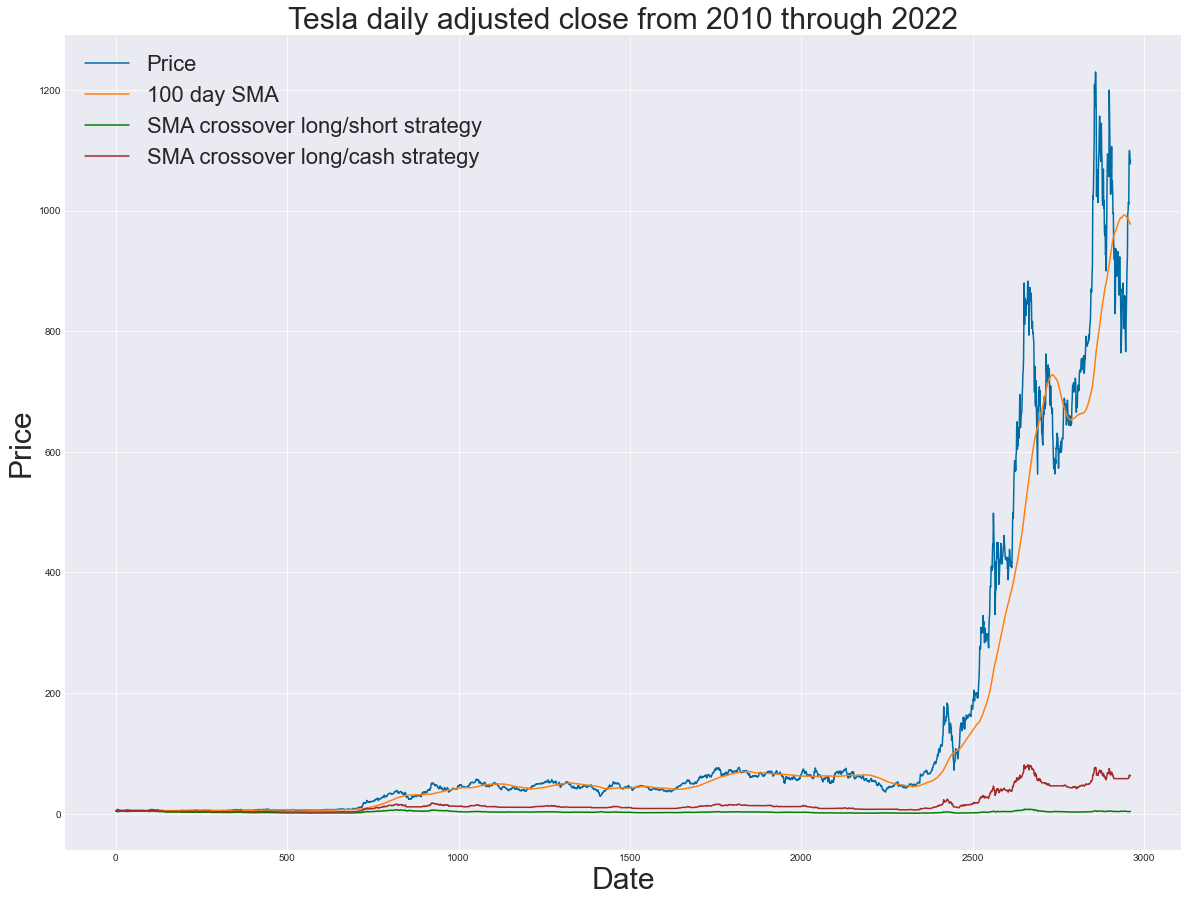

In [190]:
plt.style.use("seaborn-dark")
plt.style.use("tableau-colorblind10")

fig = plt.figure(figsize=(20,15))
ax1 = plt.plot(Tesla_dataframe["Price"])
ax1 = plt.plot(Tesla_dataframe["MA-100"])
ax1 = plt.plot(Tesla_dataframe["LongShort"], color="green")
ax1 = plt.plot(Tesla_dataframe["LongCash"], color="brown")
#ax1 = plt.plot(Tesla_dataframe["WMA-100"])
ax1 = plt.title("Tesla daily adjusted close from 2010 through 2022", fontsize=30)
ax1 = plt.xlabel("Date", fontsize=30)
ax1 = plt.ylabel("Price", fontsize=30)
#ax1 = plt.legend(["Price", "100 day SMA", "100 day WMA"],prop={"size":30}, loc="upper left")
ax1 = plt.legend(["Price", "100 day SMA", "SMA crossover long/short strategy",
 "SMA crossover long/cash strategy"],prop={"size":22}, loc="upper left")
plt.grid(True)
plt.show()

In [221]:
Principle = Tesla_dataframe.loc[-365:,["Price"]].sum()
LongShortAnnualReturnAsOf20220401 = Tesla_dataframe.loc[-365:,["LongShort"]].sum()
LongCashAnnualReturnAsOf20220401 = Tesla_dataframe.loc[-365:,["LongCash"]].sum()

In [231]:
print(LongCashAnnualReturnAsOf20220401)
print(LongShortAnnualReturnAsOf20220401)
print(Principle)

LongCash    45713.42387
dtype: float64
LongShort    8134.906976
dtype: float64
Price    416639.243092
dtype: float64


In [232]:
print("Annual Return as of 2022/4/1: ", 45713.42387/416639.243092)

Annual Return as of 2022/4/1:  0.10971943864612342


In [233]:
print("Annual Return as of 2022/4/1: ", 8134.906976/416639.243092)

Annual Return as of 2022/4/1:  0.019525061815177342
